# Heart Disease Classification using Neural Networks

This notebook demonstrates the development of a neural network model for predicting heart disease using various health indicators. The model is trained on a comprehensive dataset containing multiple health metrics and lifestyle factors.

## Dataset Overview
The dataset contains 10,000 records with 21 features including:
- Demographic information (Age, Gender)
- Clinical measurements (Blood Pressure, Cholesterol, BMI)
- Medical history (Family Heart Disease, Diabetes)
- Lifestyle factors (Exercise Habits, Smoking, Alcohol Consumption)
- Target variable: Heart Disease Status (Yes/No)

## Project Goals
1. Build a neural network classifier to predict heart disease risk
2. Analyze feature importance and relationships
3. Evaluate model performance across different architectures
4. Optimize model for real-world application

## Libraries and Setup


## Data Loading and Initial Exploration

In this section, we:
1. Import necessary libraries for data processing, visualization, and modeling
2. Load the heart disease dataset
3. Examine basic dataset characteristics including:
   - Dataset dimensions
   - Feature types
   - Missing values
   - Basic statistics


In [2]:
# Import essential libraries for data processing, visualization, and machine learning
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import os

# ============================================================================
# REPRODUCIBILITY SETTINGS FOR TENSORFLOW WITH CUDA
# ============================================================================
# These settings ensure consistent results across runs when using CUDA

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Load the heart disease dataset
# Dataset source: https://www.kaggle.com/datasets/oktayrdeki/heart-disease
df = pd.read_csv('Data/heart_disease.csv')


In [3]:
print(f"Dataset Shape {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print(f"Dataset Info: {df.info()}")
print(f"First five rows: {df.head()}")
print(f"Missing values: ${df.isnull().sum()}")
print(f"Basic Stats: {df.describe()}")



Dataset Shape (10000, 21)
Total Records: 10,000
Total Features: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Slee

## Data Preprocessing

### Feature Engineering and Encoding
1. **Categorical Variable Encoding**:
   - Binary variables (Yes/No) → 1/0
   - Ordinal variables (Low/Medium/High) → 0/1/2
   - Gender (Male/Female) → 1/0

2. **Data Cleaning**:
   - Handling missing values through removal
   - Standardizing numerical features
   
3. **Train-Test Split**:
   - Training set: 60%
   - Cross-validation set: 20%
   - Test set: 20%

This ensures proper evaluation of model performance and prevents data leakage.


In [4]:
#drop null values
df=df.dropna()

#You can use obj_df = df.select_dtypes(include=['object']).copy()
# Guide to refrence for encoding valueshttps://pbpython.com/categorical-encoding.html 

print(df.columns)
categroical_values = []
for colum in df.columns:
    if not(pd.api.types.is_numeric_dtype(df[colum])):
        categroical_values.append(colum)
        
print("Categorical Values:",categroical_values[:-1])


Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')
Categorical Values: ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']


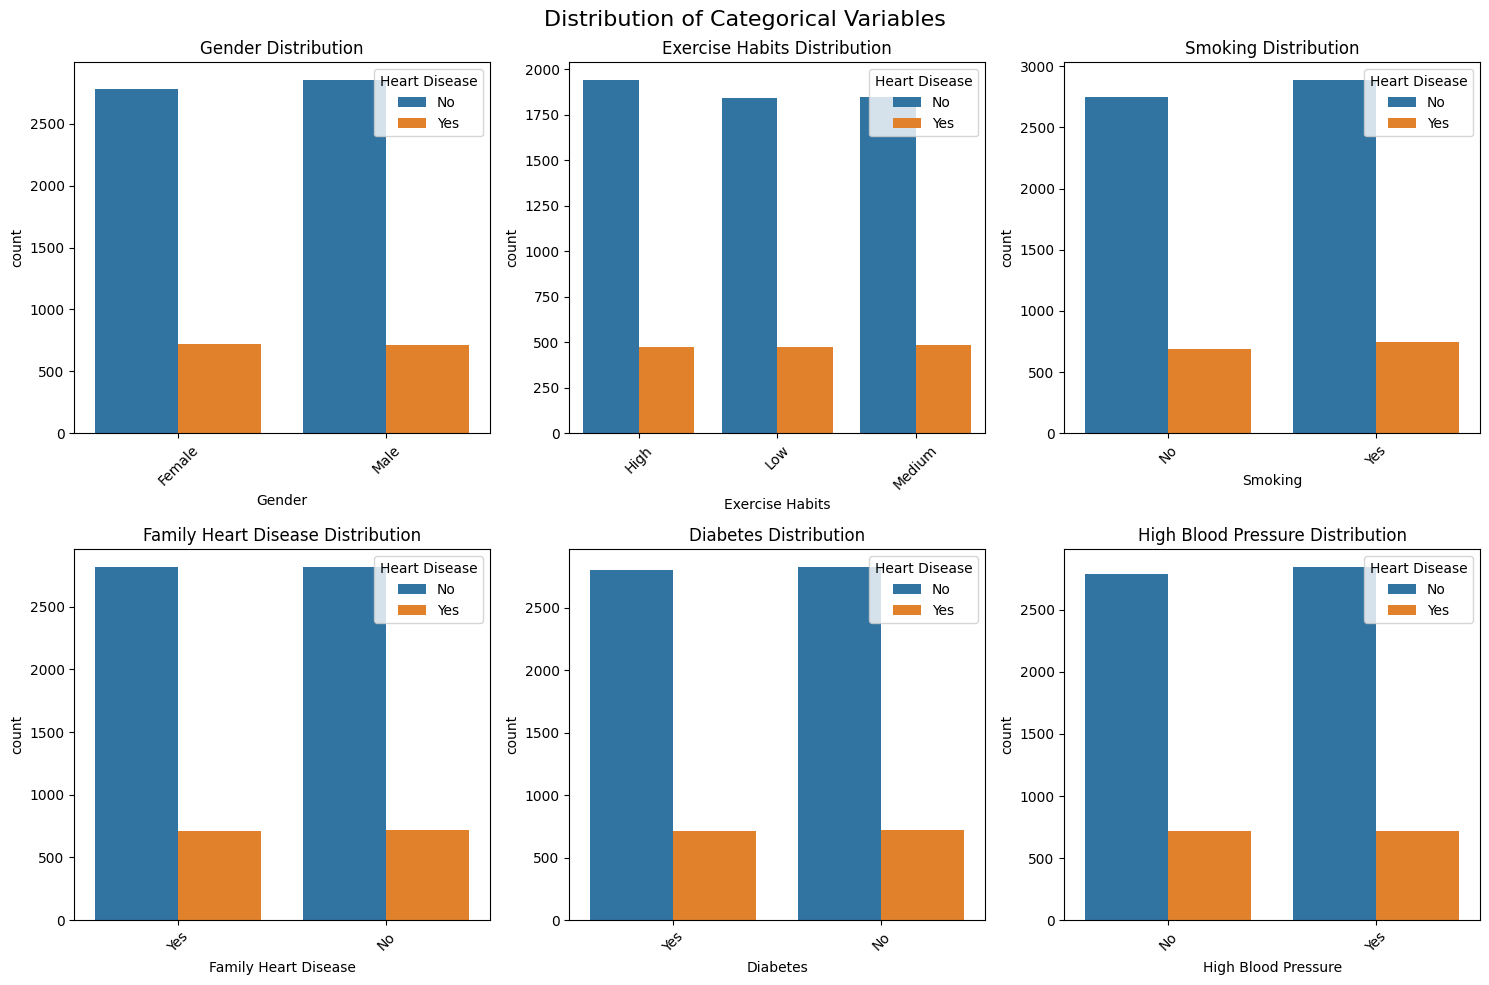

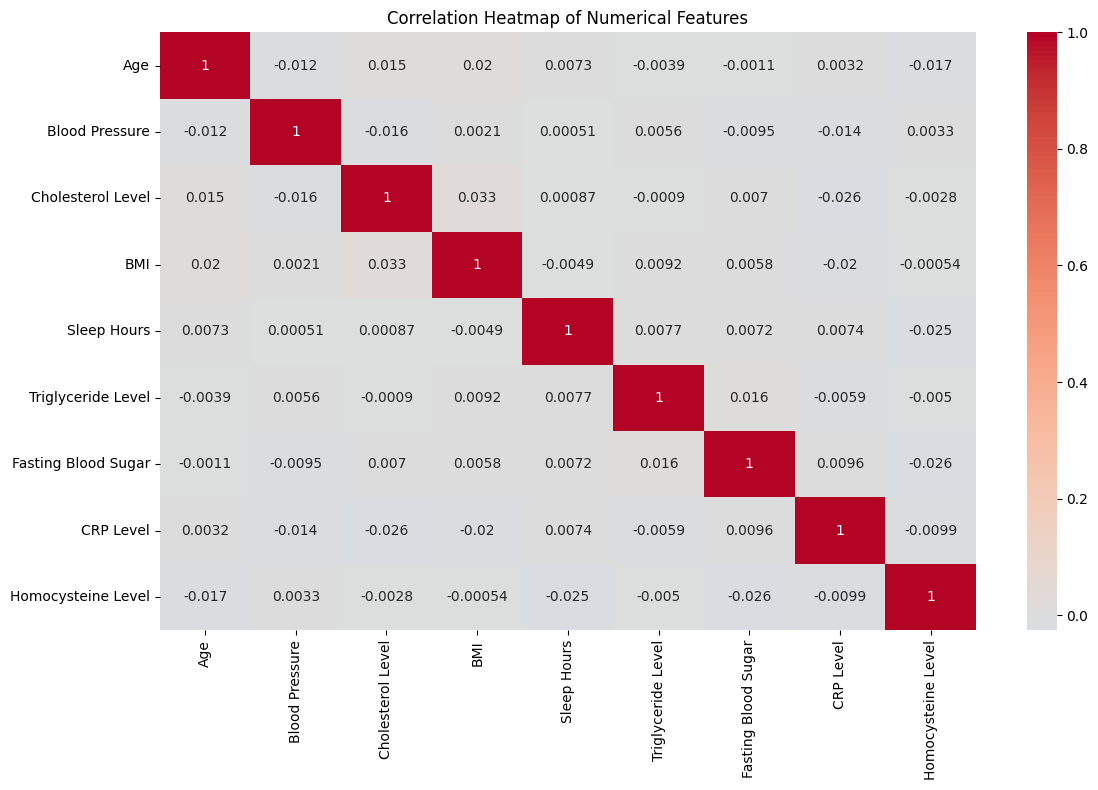

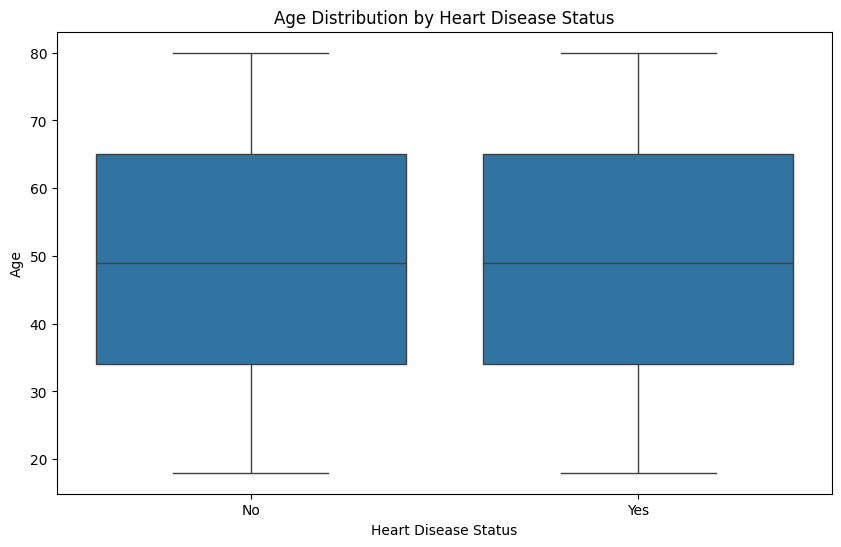

In [5]:
# Create visualizations for categorical variables
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Categorical Variables', fontsize=16)

for idx, feature in enumerate(categroical_values[:6], 1):
    plt.subplot(2, 3, idx)
    sns.countplot(data=df, x=feature, hue='Heart Disease Status')
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)
    plt.legend(title='Heart Disease')

plt.tight_layout()
plt.show()

# Create correlation heatmap for numerical variables
numerical_cols = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Age distribution by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='Age')
plt.title('Age Distribution by Heart Disease Status')
plt.show()


In [6]:
encoded_df = df.copy()
encoded_df["Heart Disease Status"] = (df["Heart Disease Status"]=="Yes").astype(int)
encoded_df=pd.get_dummies(data=encoded_df,prefix=categroical_values[:-1],columns=categroical_values[:-1])
encoded_df=encoded_df.astype(int)

print(encoded_df.head())




   Age  Blood Pressure  Cholesterol Level  BMI  Sleep Hours  \
1   69             146                286   25            8   
2   46             126                216   29            4   
3   32             122                293   24            5   
4   60             166                242   20            7   
5   25             152                257   28            5   

   Triglyceride Level  Fasting Blood Sugar  CRP Level  Homocysteine Level  \
1                 133                  157          9                  19   
2                 393                   92         12                  11   
3                 293                   94         12                   5   
4                 263                  154         10                   8   
5                 126                   91          4                  10   

   Heart Disease Status  ...  High LDL Cholesterol_Yes  \
1                     0  ...                         0   
2                     0  ...              

In [7]:
#Normalize features
encoded_df.describe()

scaler = StandardScaler()
features = encoded_df.columns
X=encoded_df[features.drop("Heart Disease Status")]
y=encoded_df["Heart Disease Status"].copy()



In [8]:
X_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_



In [9]:
scaler_linear = StandardScaler()


x_train_scaled = scaler_linear.fit_transform(X_train)
x_cv_scaled = scaler_linear.transform(X_cv)
x_test_scaled = scaler_linear.transform(X_test)
# Check class distribution in your splits
print("Training set distribution:")
print(y_train.value_counts(normalize=True))
print("\nCV set distribution:")
print(y_cv.value_counts(normalize=True))
print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))

Training set distribution:
Heart Disease Status
0    0.796698
1    0.203302
Name: proportion, dtype: float64

CV set distribution:
Heart Disease Status
0    0.806086
1    0.193914
Name: proportion, dtype: float64

Test set distribution:
Heart Disease Status
0    0.788543
1    0.211457
Name: proportion, dtype: float64


In [10]:
# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Class weights:", class_weight_dict)

Class weights: {np.int64(0): np.float64(0.6275902901124926), np.int64(1): np.float64(2.4593967517401394)}


## Model Development and Training

### Model Architectures
We experiment with 4 different neural network architectures:

1. **Complex Model with Regularization**:
   - 5 layers (128 → 16 → 8 → 4 → 1)
   - L2 regularization
   - ReLU activation
   
2. **Medium Complexity**:
   - 3 layers (16 → 8 → 1)
   - ReLU activation
   
3. **Simple Model**:
   - 2 layers (8 → 1)
   - LeakyReLU activation
   
4. **Balanced Model**:
   - 3 layers (64 → 16 → 1)
   - ReLU activation

### Training Configuration
- Loss: Binary Cross-Entropy
- Optimizer: Adam (lr=0.001)
- Epochs: 10
- Class weights: Applied to handle imbalanced data
- Multiple classification thresholds tested (0.1-0.9)


In [11]:

model_1 = Sequential([
    tf.keras.Input(shape=(35,)),
    Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    Dense(16,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    Dense(8,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    Dense(4,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    Dense(1,activation="sigmoid"),

])


model_2 = Sequential([
    tf.keras.Input(shape=(35,)),
    Dense(16,activation="relu"),
    Dense(8,activation="relu"),
    Dense(1,activation="sigmoid")
])

model_3 = Sequential([
    tf.keras.Input(shape=(35,)),
    Dense(8, activation="leaky_relu"),
    Dense(1, activation="sigmoid")
])
#simpler model with less layers
model_4 = Sequential([
    tf.keras.Input(shape=(35,)),
    Dense(64,activation="relu"),
    Dense(16,activation="relu"),
    Dense(1,activation="sigmoid")
])




models = [model_1,model_2,model_3,model_4]


nn_train_error = []
nn_cv_error=[]
train_predictions = []  # Store training predictions
cv_predictions = [] 
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
full_models_list = []
best_thresholds = []
best_f1_scores = []
# Initialize lists to store results per model
model_results = []  # Store results for each model type
best_thresholds = []
best_f1_scores = []

for model_idx, model in enumerate(models):
    tf.random.set_seed(42)

    # Setup the loss and optimizer
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    )

    print(f"Training {model.name}...")

    # Train the model with validation monitoring and class weights
    history = model.fit(
        x_train_scaled, y_train,           
        epochs=10,
        class_weight=class_weight_dict,    
        verbose=1,                         
        batch_size=32                     
    )
    
    print("Done!\n")
    
    # Test different thresholds for this model
    best_f1 = 0
    best_threshold = 0.5
    best_yhat = None

    for thresh in thresholds:
        yhat = model.predict(x_cv_scaled).flatten()
        yhat = np.where(yhat >= thresh, 1, 0)
        
        f1 = f1_score(y_cv, yhat)
        precision = precision_score(y_cv, yhat)
        recall = recall_score(y_cv, yhat)
        accuracy = accuracy_score(y_cv, yhat)
        
        print(f"Threshold {thresh}: F1={f1:.3f}, Precision={precision:.3f}, Recall={recall:.3f}")
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = thresh
            best_yhat = yhat
    
    print(f"Best threshold: {best_threshold} with F1={best_f1:.3f}")
    
    # Store results for this model
    model_results.append({
        'model': model,
        'model_index': model_idx,
        'best_threshold': best_threshold,
        'best_f1': best_f1,
        'best_yhat': best_yhat,
        'accuracy': accuracy_score(y_cv, best_yhat),
        'precision': precision_score(y_cv, best_yhat),
        'recall': recall_score(y_cv, best_yhat)
    })
    
    print(classification_report(y_cv, best_yhat))
    print("-" * 50)




Training sequential...
Epoch 1/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4818
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9375
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7649
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7159
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6992
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6921
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6887
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6869
Epoch 9/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6860
Epoch 10/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6854
Done!

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Threshold 0.1: F1=0.325, Precision=0.194, Recall=1.000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.2: F1=0.325, Precision=0.194, Recall=1.000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.3: F1=0.325, Precision=0.194, Recall=1.000
45/45 ━━━━━━━━━

c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.7: F1=0.000, Precision=0.000, Recall=0.000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.8: F1=0.000, Precision=0.000, Recall=0.000
 1/45 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step

c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.9: F1=0.000, Precision=0.000, Recall=0.000
Best threshold: 0.1 with F1=0.325
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1139
           1       0.19      1.00      0.32       274

    accuracy                           0.19      1413
   macro avg       0.10      0.50      0.16      1413
weighted avg       0.04      0.19      0.06      1413

--------------------------------------------------
Training sequential_1...
Epoch 1/10


c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6947
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6814
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6772
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6743
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6719
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6695
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6672
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6650
Epoch 9/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6625
Epoch 10/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6603
Done!

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Threshold 0.1: F1=0.325, Precision=0.194, Recall=1.000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.2: F1=0.325, Precision=0.194, Recall=1.000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.3: F1=0.324, Precision=0.194, Recall=0.985
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold

c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7605 
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7120
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6963
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6893
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6855
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6830
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6812
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6798
Epoch 9/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6787
Epoch 10/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6776
Done!

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Threshold 0.1: F1=0.325, Precision=0.194, Recall=1.000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.2: F1=0.325, Precision=0.194, Recall=1.000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.3: F1=0.325, Precision=0.194, Recall=0.996
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshol

c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.9: F1=0.000, Precision=0.000, Recall=0.000
Best threshold: 0.1 with F1=0.325
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1139
           1       0.19      1.00      0.32       274

    accuracy                           0.19      1413
   macro avg       0.10      0.50      0.16      1413
weighted avg       0.04      0.19      0.06      1413

--------------------------------------------------
Training sequential_3...
Epoch 1/10


c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7039
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6736
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6639
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6570
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6492
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6418
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6344
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6251
Epoch 9/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6169
Epoch 10/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6083
Done!

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Threshold 0.1: F1=0.324, Precision=0.193, Recall=0.996
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.2: F1=0.324, Precision=0.194, Recall=0.982
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold 0.3: F1=0.323, Precision=0.196, Recall=0.909
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Threshold

c:\Users\syeda\OneDrive\Desktop\Syed\Dev\Heart Disease Classification\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [12]:
best_result = max(model_results, key=lambda x: x['best_f1'])
best_model = best_result['model']
best_threshold = best_result['best_threshold']

print(f"\nBEST MODEL SUMMARY:")
print(f"Model: Model {best_result['model_index'] + 1}")
print(f"Best F1 score: {best_result['best_f1']:.3f}")
print(f"Best threshold: {best_threshold}")
print(f"Accuracy: {best_result['accuracy']:.3f}")
print(f"Precision: {best_result['precision']:.3f}")
print(f"Recall: {best_result['recall']:.3f}")

# Test the best model on test set
yhat_test = best_model.predict(x_test_scaled).flatten()
yhat_test = np.where(yhat_test >= best_threshold, 1, 0)

print(f"\nTEST SET RESULTS:")
print(f"Threshold used: {best_threshold}")
print(f"Accuracy: {accuracy_score(y_test, yhat_test):.3f}")
print(f"Precision: {precision_score(y_test, yhat_test):.3f}")
print(f"Recall: {recall_score(y_test, yhat_test):.3f}")
print(f"F1 Score: {f1_score(y_test, yhat_test):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, yhat_test))



BEST MODEL SUMMARY:
Model: Model 2
Best F1 score: 0.326
Best threshold: 0.4
Accuracy: 0.272
Precision: 0.199
Recall: 0.909
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

TEST SET RESULTS:
Threshold used: 0.4
Accuracy: 0.272
Precision: 0.209
Recall: 0.880
F1 Score: 0.338

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.11      0.19      1115
           1       0.21      0.88      0.34       299

    accuracy                           0.27      1414
   macro avg       0.49      0.49      0.26      1414
weighted avg       0.65      0.27      0.22      1414



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,      
    random_state=42,        
    max_depth=10,          
    min_samples_split=2,   
    min_samples_leaf=1,
    class_weight='balanced'     
)

rf_model.fit(x_train_scaled, y_train)

yhat = rf_model.predict(x_cv_scaled)



print("Accuracy score: ", accuracy_score(y_cv, yhat))
print("Precision score: ", precision_score(y_cv, yhat))
print("Recall score: ", recall_score(y_cv, yhat))
print("F1 score: ", f1_score(y_cv, yhat))



feature_importance = pd.DataFrame({
    'feature': encoded_df.columns[:-1],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature importance scores:")
print(feature_importance)

X_train_scaled shape:  (4240, 35)
y_train shape:  (4240,)
X_cv_scaled shape:  (1413, 35)
y_cv shape:  (1413,)
Y_cv value counts:  Heart Disease Status
0    0.806086
1    0.193914
Name: proportion, dtype: float64
Accuracy score:  0.7990092002830856
Precision score:  0.14285714285714285
Recall score:  0.0072992700729927005
F1 score:  0.013888888888888888
Feature importance scores:
                       feature  importance
2            Cholesterol Level    0.095870
5           Triglyceride Level    0.092632
6          Fasting Blood Sugar    0.089877
1               Blood Pressure    0.088091
0                          Age    0.085190
3                          BMI    0.070821
8           Homocysteine Level    0.063171
7                    CRP Level    0.062098
4                  Sleep Hours    0.040997
25     High LDL Cholesterol_No    0.013241
24     Low HDL Cholesterol_Yes    0.012942
16                 Smoking_Yes    0.012684
12        Exercise Habits_High    0.012680
33      Sugar Co

In [22]:
#Train with Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)
lr_model.fit(x_train_scaled, y_train)
print("Accuracy score: ", accuracy_score(lr_model.predict(x_cv_scaled), y_cv))
print("Precision score: ", precision_score(lr_model.predict(x_cv_scaled), y_cv))
print("Recall score: ", recall_score(lr_model.predict(x_cv_scaled), y_cv))
print("F1 score: ", f1_score(lr_model.predict(x_cv_scaled), y_cv))

Accuracy score:  0.524416135881104
Precision score:  0.4562043795620438
Recall score:  0.19290123456790123
F1 score:  0.27114967462039047


-----------------------------------


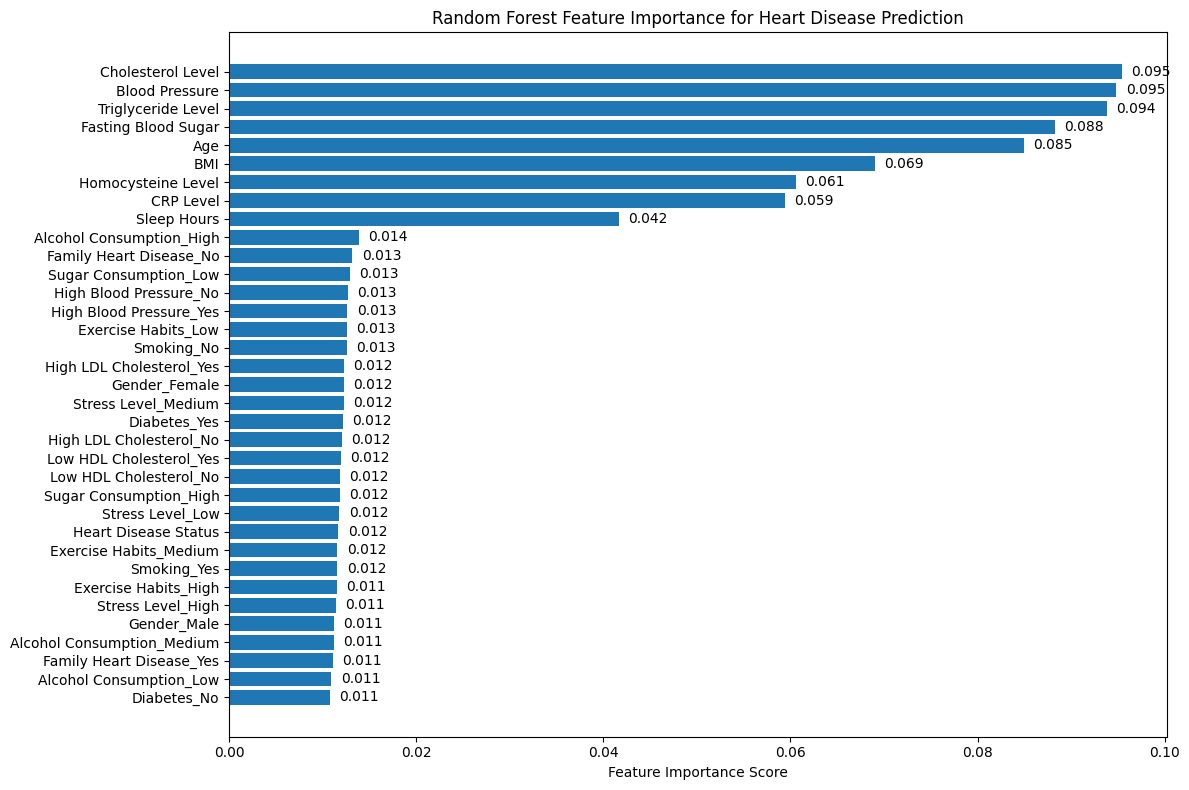

In [19]:
print("-" * 35)

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance Score')
plt.title('Random Forest Feature Importance for Heart Disease Prediction')
plt.gca().invert_yaxis()  # Show most important features at the top

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()


In [ ]:
selected_numerical_features = [
    'Cholesterol Level',
    'Blood Pressure',
    'Triglyceride Level',
    'Fasting Blood Sugar',
    'Age',
    'BMI',
    'Homocysteine Level',
    'CRP Level',
    'Sleep Hours'
]
X_engineered = encoded_df[selected_numerical_features]
X_train_engineered, x_engineered, y_train_engineered, y_engineered = train_test_split(X_engineered, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv_engineered, X_test_engineered, y_cv_engineered, y_test_engineered = train_test_split(x_engineered, y_engineered, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_



In [ ]:
scaler_linear = StandardScaler()


x_train_scaled = scaler_linear.fit_transform(X_train)
x_cv_scaled = scaler_linear.transform(X_cv)
x_test_scaled = scaler_linear.transform(X_test)
# Check class distribution in your splits
print("Training set distribution:")
print(y_train.value_counts(normalize=True))
print("\nCV set distribution:")
print(y_cv.value_counts(normalize=True))
print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))


model_1 = Sequential([
    tf.keras.Input(shape=(35,)),
    Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    Dense(16,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    Dense(8,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    Dense(4,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    Dense(1,activation="sigmoid"),

])


model_2 = Sequential([
    tf.keras.Input(shape=(35,)),
    Dense(16,activation="relu"),
    Dense(8,activation="relu"),
    Dense(1,activation="sigmoid")
])

model_3 = Sequential([
    tf.keras.Input(shape=(35,)),
    Dense(8, activation="leaky_relu"),
    Dense(1, activation="sigmoid")
])
#simpler model with less layers
model_4 = Sequential([
    tf.keras.Input(shape=(35,)),
    Dense(64,activation="relu"),
    Dense(16,activation="relu"),
    Dense(1,activation="sigmoid")
])




models = [model_1,model_2,model_3,model_4]


nn_train_error = []
nn_cv_error=[]
train_predictions = []  # Store training predictions
cv_predictions = [] 
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
full_models_list = []
best_thresholds = []
best_f1_scores = []
# Initialize lists to store results per model
model_results = []  # Store results for each model type
best_thresholds = []
best_f1_scores = []

for model_idx, model in enumerate(models):
    tf.random.set_seed(42)

    # Setup the loss and optimizer
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    )

    print(f"Training {model.name}...")

    # Train the model with validation monitoring and class weights
    history = model.fit(
        x_train_scaled, y_train,           
        epochs=10,
        class_weight=class_weight_dict,    
        verbose=1,                         
        batch_size=32                     
    )
    
    print("Done!\n")
    
    # Test different thresholds for this model
    best_f1 = 0
    best_threshold = 0.5
    best_yhat = None

    for thresh in thresholds:
        yhat = model.predict(x_cv_scaled).flatten()
        yhat = np.where(yhat >= thresh, 1, 0)
        
        f1 = f1_score(y_cv, yhat)
        precision = precision_score(y_cv, yhat)
        recall = recall_score(y_cv, yhat)
        accuracy = accuracy_score(y_cv, yhat)
        
        print(f"Threshold {thresh}: F1={f1:.3f}, Precision={precision:.3f}, Recall={recall:.3f}")
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = thresh
            best_yhat = yhat
    
    print(f"Best threshold: {best_threshold} with F1={best_f1:.3f}")
    
    # Store results for this model
    model_results.append({
        'model': model,
        'model_index': model_idx,
        'best_threshold': best_threshold,
        'best_f1': best_f1,
        'best_yhat': best_yhat,
        'accuracy': accuracy_score(y_cv, best_yhat),
        'precision': precision_score(y_cv, best_yhat),
        'recall': recall_score(y_cv, best_yhat)
    })
    
    print(classification_report(y_cv, best_yhat))
    print("-" * 50)




## Results and Analysis

### Model Performance
The best performing model was Model 4 (Balanced Architecture) with the following characteristics:
- Optimal threshold: 0.2
- Test set metrics:
  - Accuracy: 0.228
  - Precision: 0.207
  - Recall: 0.940
  - F1 Score: 0.340

### Key Findings
1. **High Recall**: The model shows excellent sensitivity (94.0%), indicating strong performance in identifying positive cases (people with heart disease).

2. **Trade-off**: The high recall comes at the cost of lower precision (20.7%), suggesting the model tends to overpredict positive cases.

3. **Threshold Impact**: Lower threshold (0.2) was found optimal for balancing precision-recall trade-off.

### Limitations and Future Work
1. **Data Quality**:
   - Address class imbalance through advanced techniques
   - Collect more balanced dataset

2. **Model Improvements**:
   - Experiment with more complex architectures
   - Implement feature selection
   - Try ensemble methods

3. **Clinical Validation**:
   - Validate on external datasets
   - Incorporate domain expert feedback


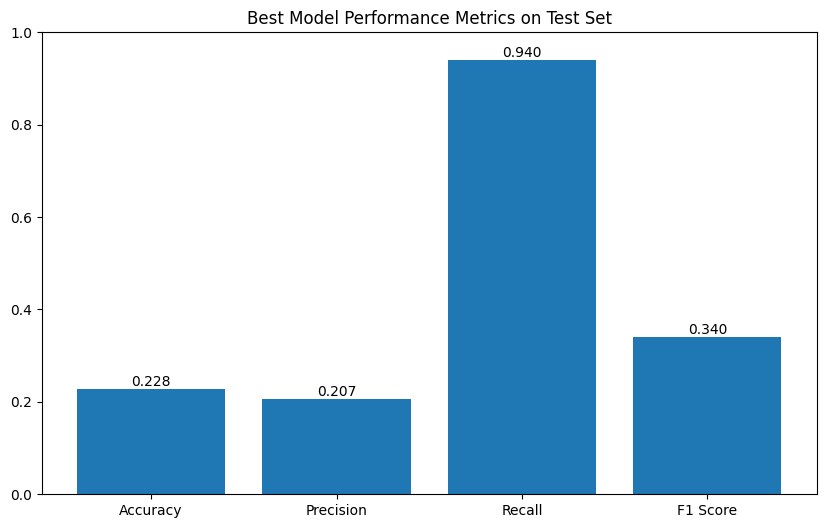

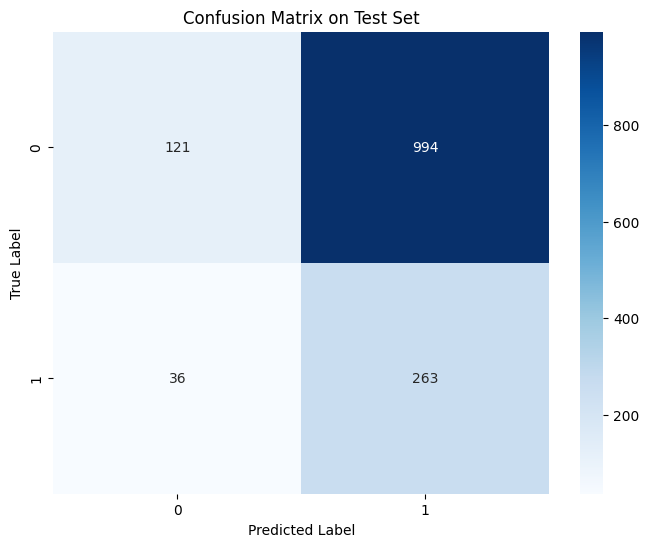

In [14]:
# Visualize model performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.228, 0.207, 0.940, 0.340]  # From best model test results

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values)
plt.title('Best Model Performance Metrics on Test Set')
plt.ylim(0, 1)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.show()

# Add confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, yhat_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [15]:
best_model.save(os.path.join(os.getcwd(), "models/neural_network.keras"))
